In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras

In [25]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
y_train.shape

(60000,)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
y_test.shape

(10000,)

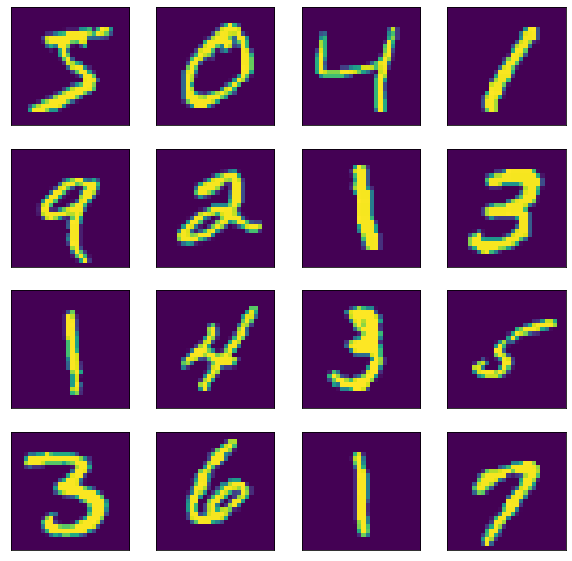

In [30]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()    

In [31]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=10,
                   validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 252s 4ms/sample - loss: 0.2085 - accuracy: 0.9481 - val_loss: 0.0613 - val_accuracy: 0.9802
Epoch 2/10
60000/60000 [==============================] - 273s 5ms/sample - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0555 - val_accuracy: 0.9825
Epoch 3/10
60000/60000 [==============================] - 276s 5ms/sample - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0466 - val_accuracy: 0.9838
Epoch 4/10
60000/60000 [==============================] - 273s 5ms/sample - loss: 0.0390 - accuracy: 0.9886 - val_loss: 0.0363 - val_accuracy: 0.9895
Epoch 5/10
60000/60000 [==============================] - 267s 4ms/sample - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0474 - val_accuracy: 0.9870
Epoch 6/10
60000/60000 [==============================] - 259s 4ms/sample - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0600 - val_accuracy: 0.9855
Epoch 7/10
60000/60000 [==========================

C:\Users\alliswell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


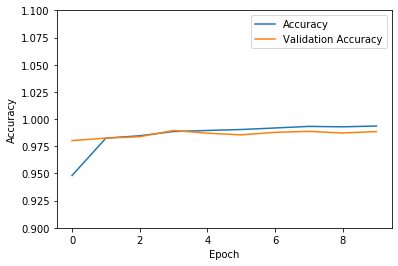

In [41]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.1])
plt.legend(loc='lower_right')
plt.show()

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/1 - 10s - loss: 0.0227 - accuracy: 0.9885


In [38]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.045429880184007336
Test Accuracy:  0.9885
